In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df  = pd.read_csv('inventory_data_noisy.csv')
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [4]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [5]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [6]:
df['Date']=df['Date'].fillna(method='ffill')

C:\Users\CVR\AppData\Local\Temp\ipykernel_12408\3582742583.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date']=df['Date'].fillna(method='ffill')


In [8]:
median=df['Quantity'].median()
median

np.float64(54.0)

In [10]:
df['Quantity']=df['Quantity'].fillna(median)

In [11]:
cmedian=df['Consumption'].median()
cmedian

np.float64(12.0)

In [12]:
df['Consumption']=df['Consumption'].fillna(cmedian)

In [14]:
lmode=df['Location'].mode()
lmode

0    New York
Name: Location, dtype: object

In [15]:
df['Location']=df['Location'].fillna(lmode[0])

In [17]:
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [18]:
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
df.isna().sum()

C:\Users\CVR\AppData\Local\Temp\ipykernel_12408\1958396440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(df['Location'].mode()[0],inplace=True)


Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(341)

In [20]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Text(0.5, 1.0, 'Distribution of Consumption')

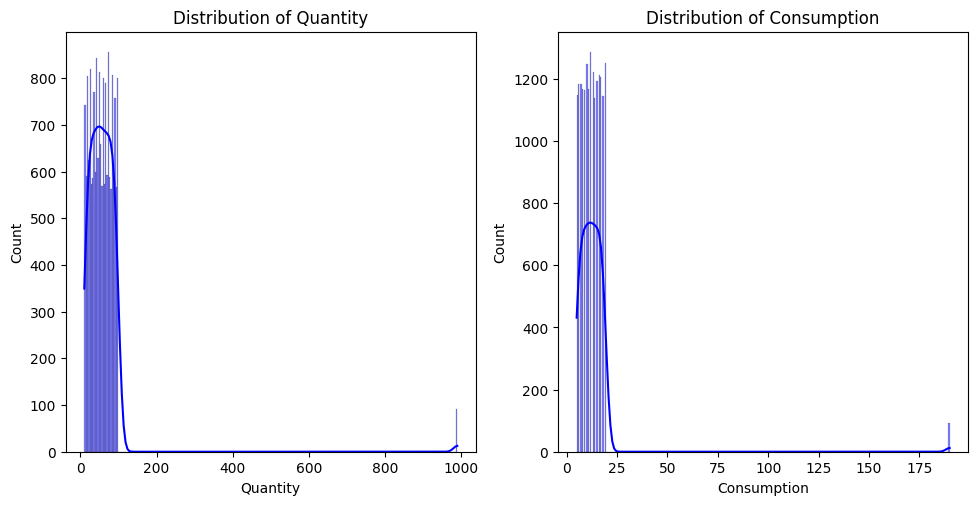

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')


Text(0.5, 1.0, 'Boxplot of Consumption')

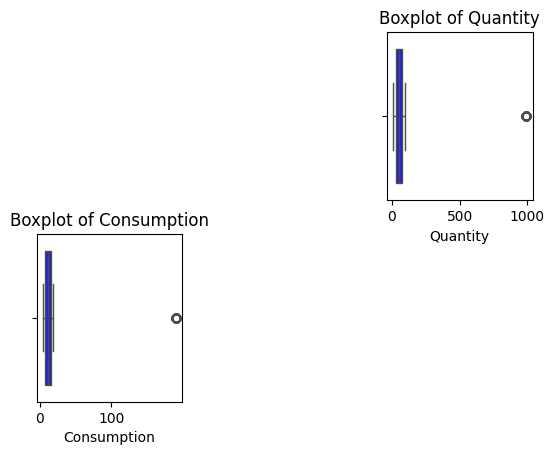

In [23]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

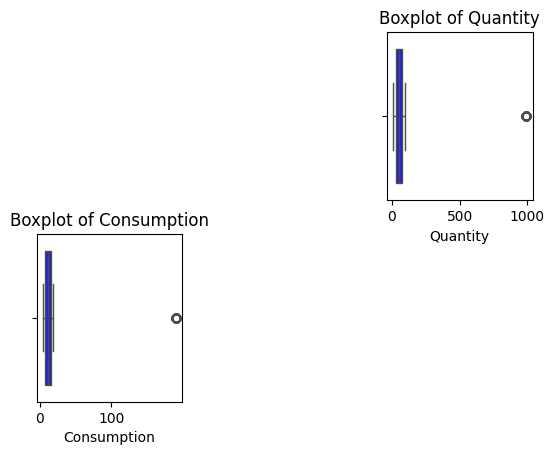

In [24]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [25]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Select the columns for outlier removal (adjust as needed)
columns_to_filter = ["Quantity", "Consumption"]  
df= remove_outliers_iqr(df, columns_to_filter)


Text(0.5, 1.0, 'Distribution of Consumption')

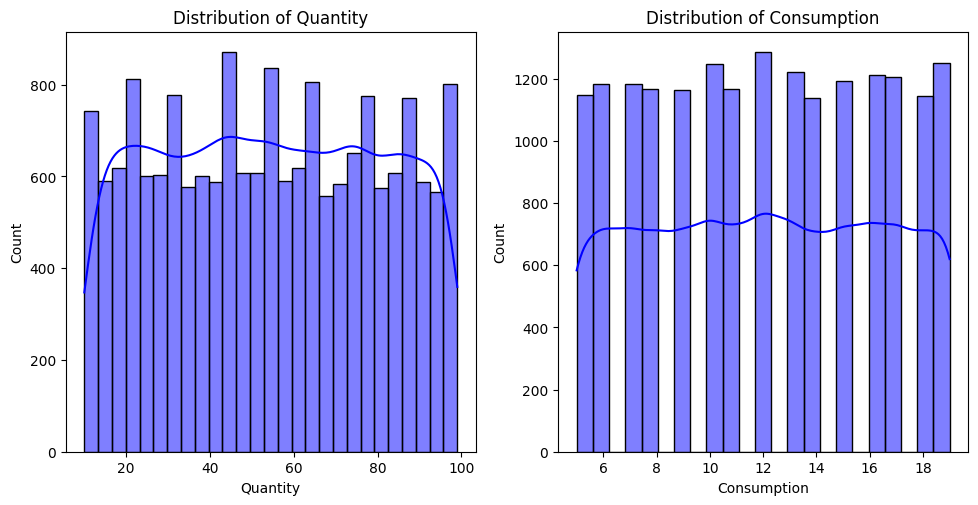

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

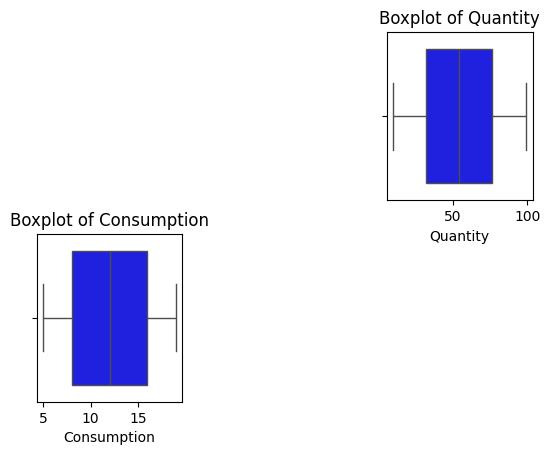

In [27]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [28]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(df['Location'].unique())

Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


In [29]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Date', 'Quantity', 'Consumption']

We have 3 categorical features : ['Dealer_ID', 'Product_ID', 'Location']


In [30]:
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [31]:
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

In [32]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


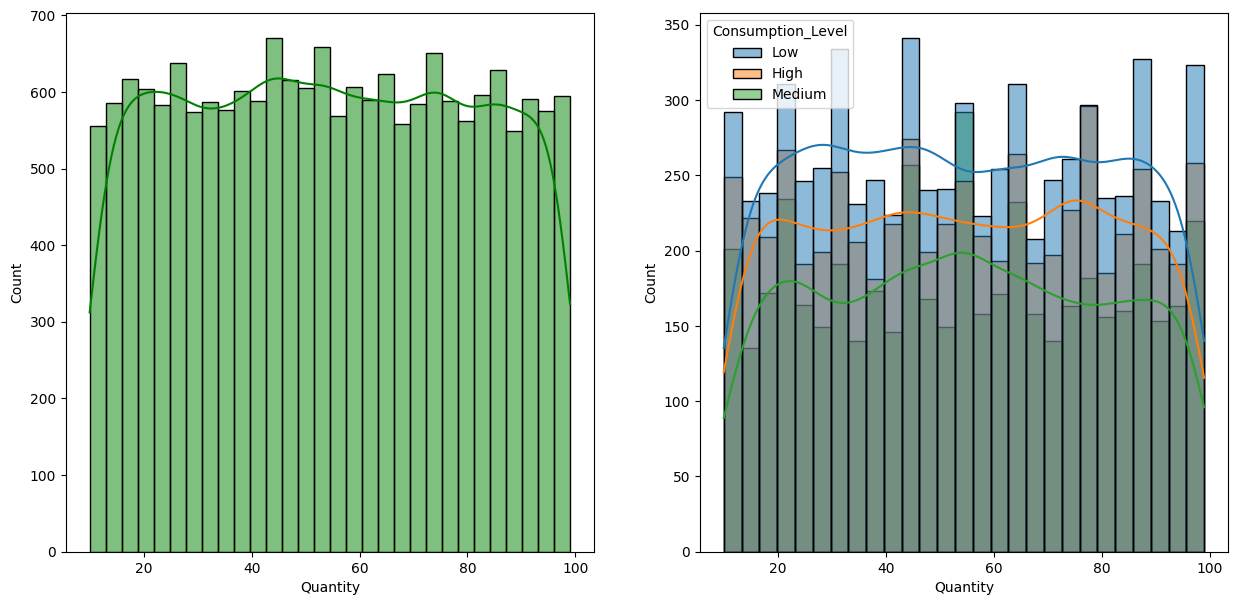

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

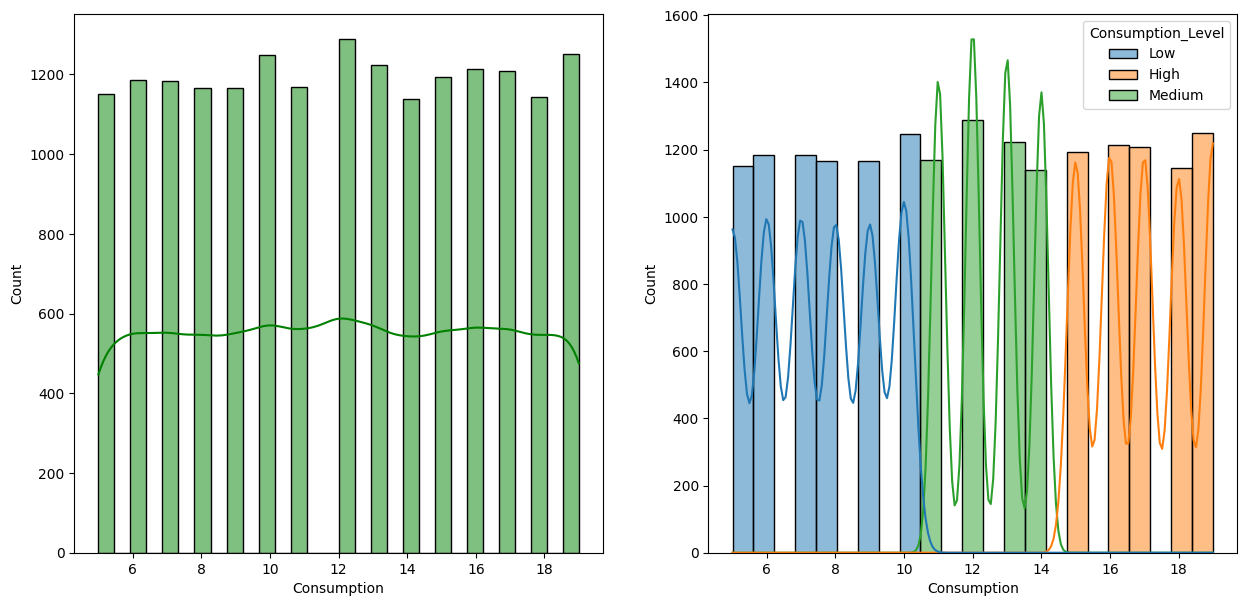

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

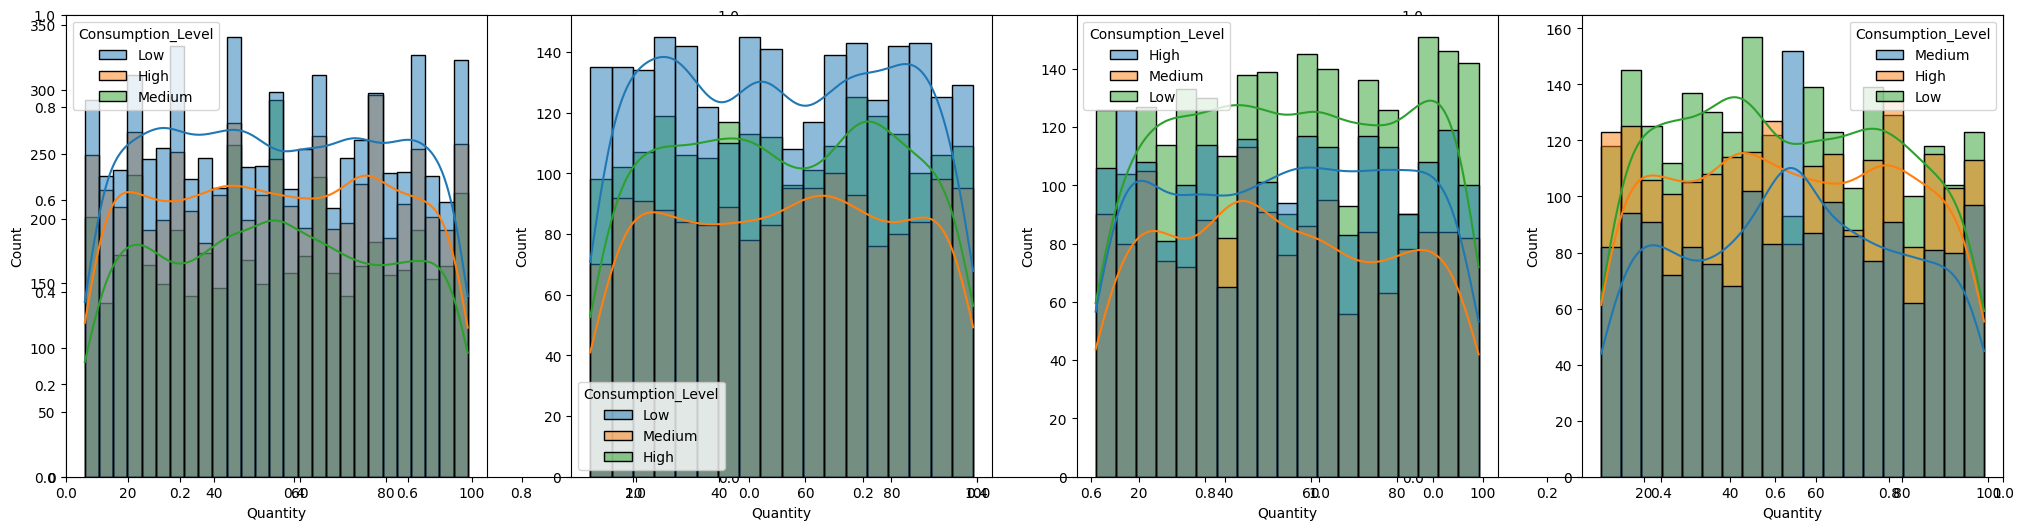

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

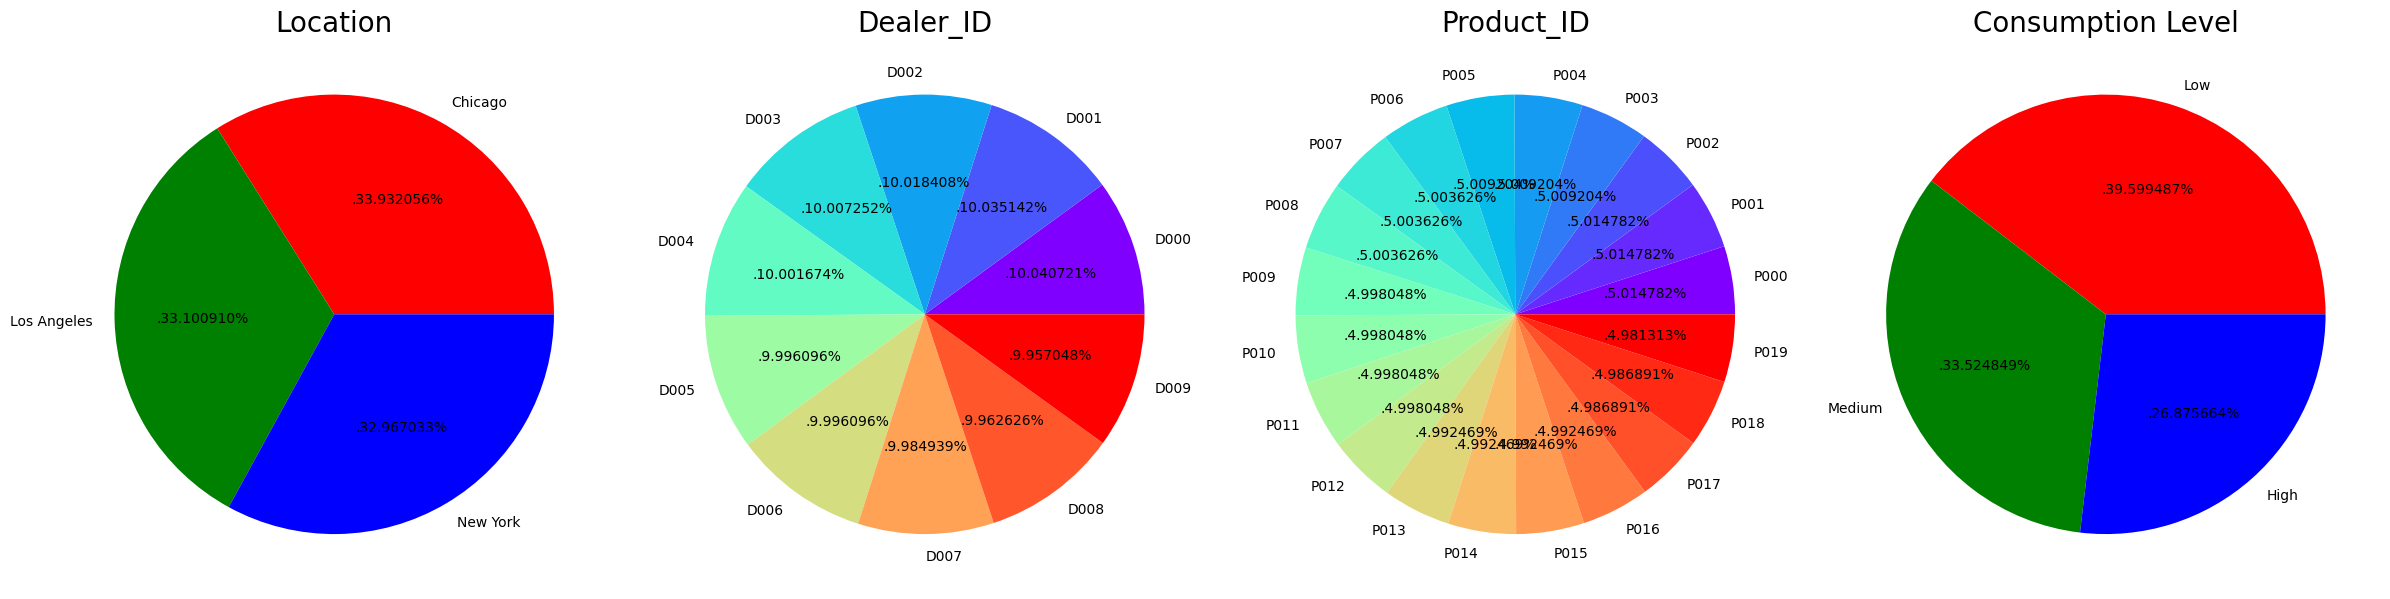

In [36]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Location'].value_counts()
labels = 'Chicago', 'Los Angeles','New York'
color = ['red','green','blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Dealer_ID'].value_counts()
labels = 'D000', 'D001','D002','D003','D004','D005','D006','D007','D008','D009'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Dealer_ID', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Product_ID'].value_counts()
labels = 'P000', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Product_ID', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Consumption_Level'].value_counts()
labels = 'Low', 'Medium','High'
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Consumption Level', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_12408\3621756012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


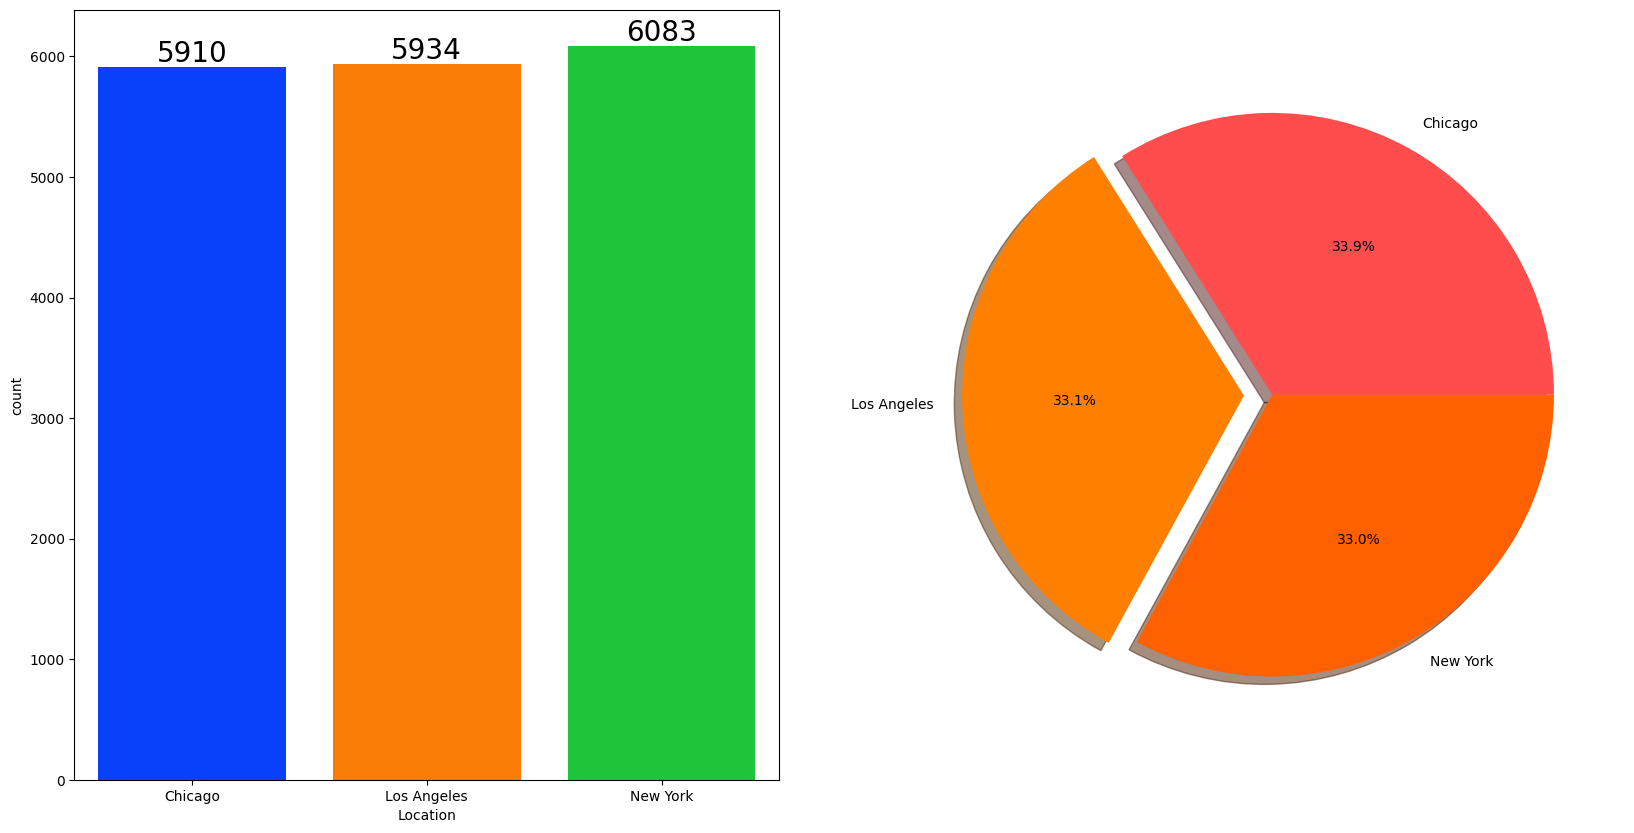

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

In [38]:
location_group = df.groupby('Location')
location_group

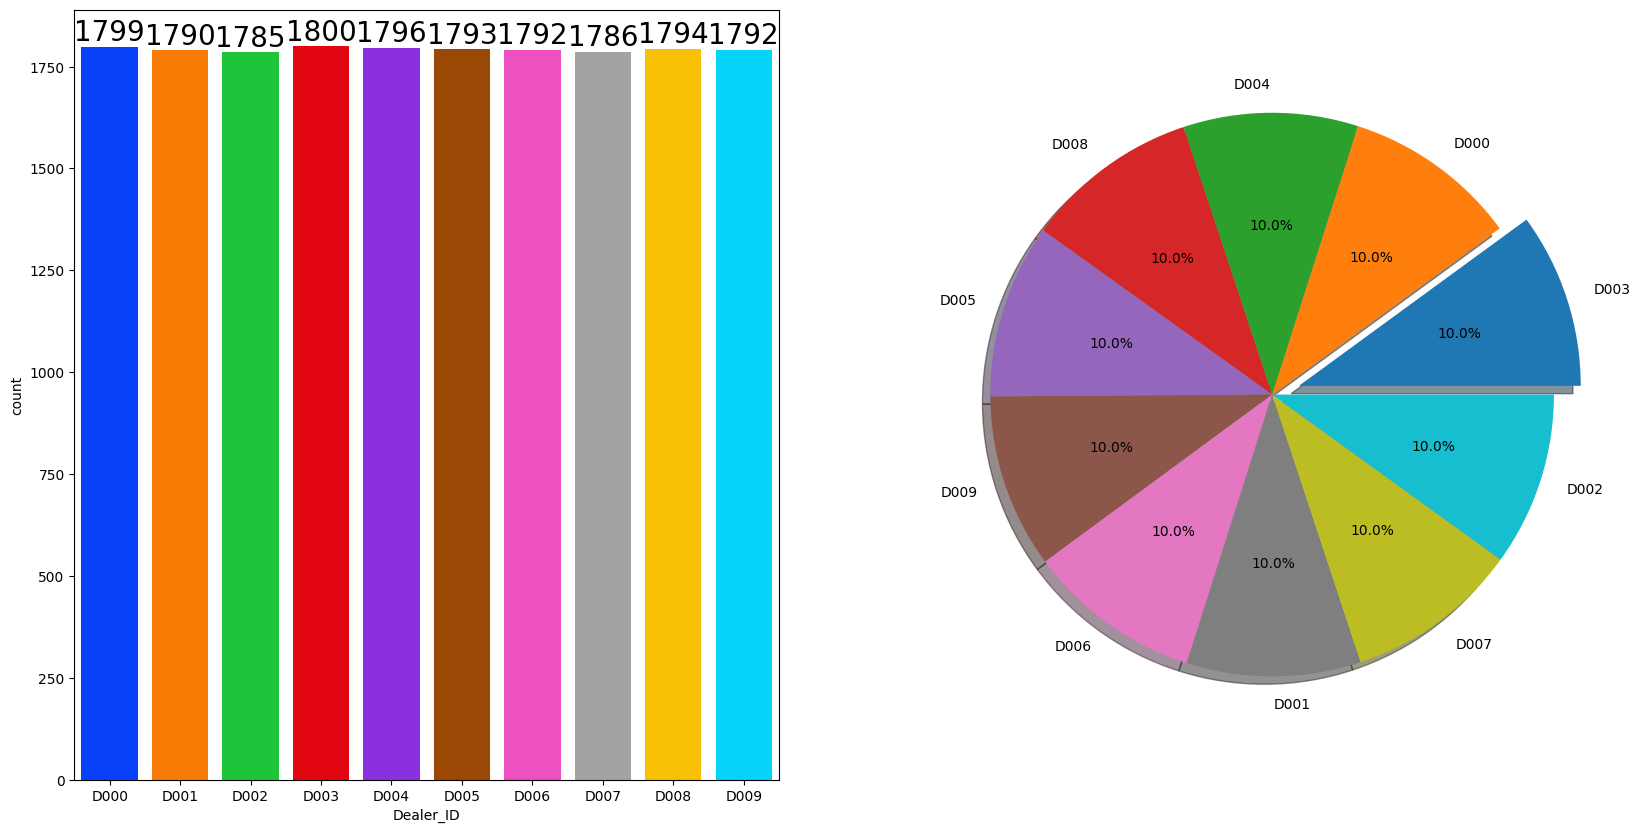

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

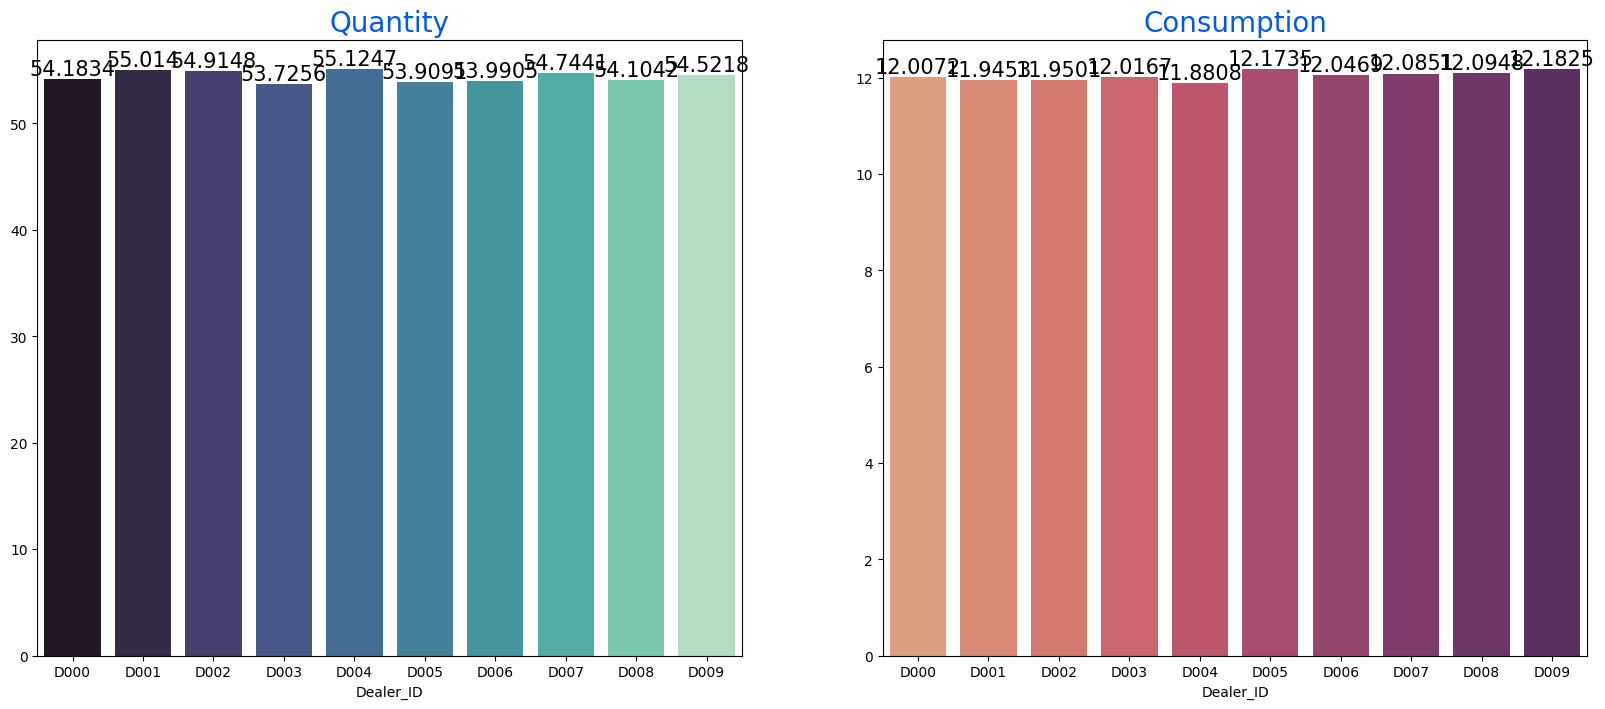

In [44]:
Group_data2=df.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

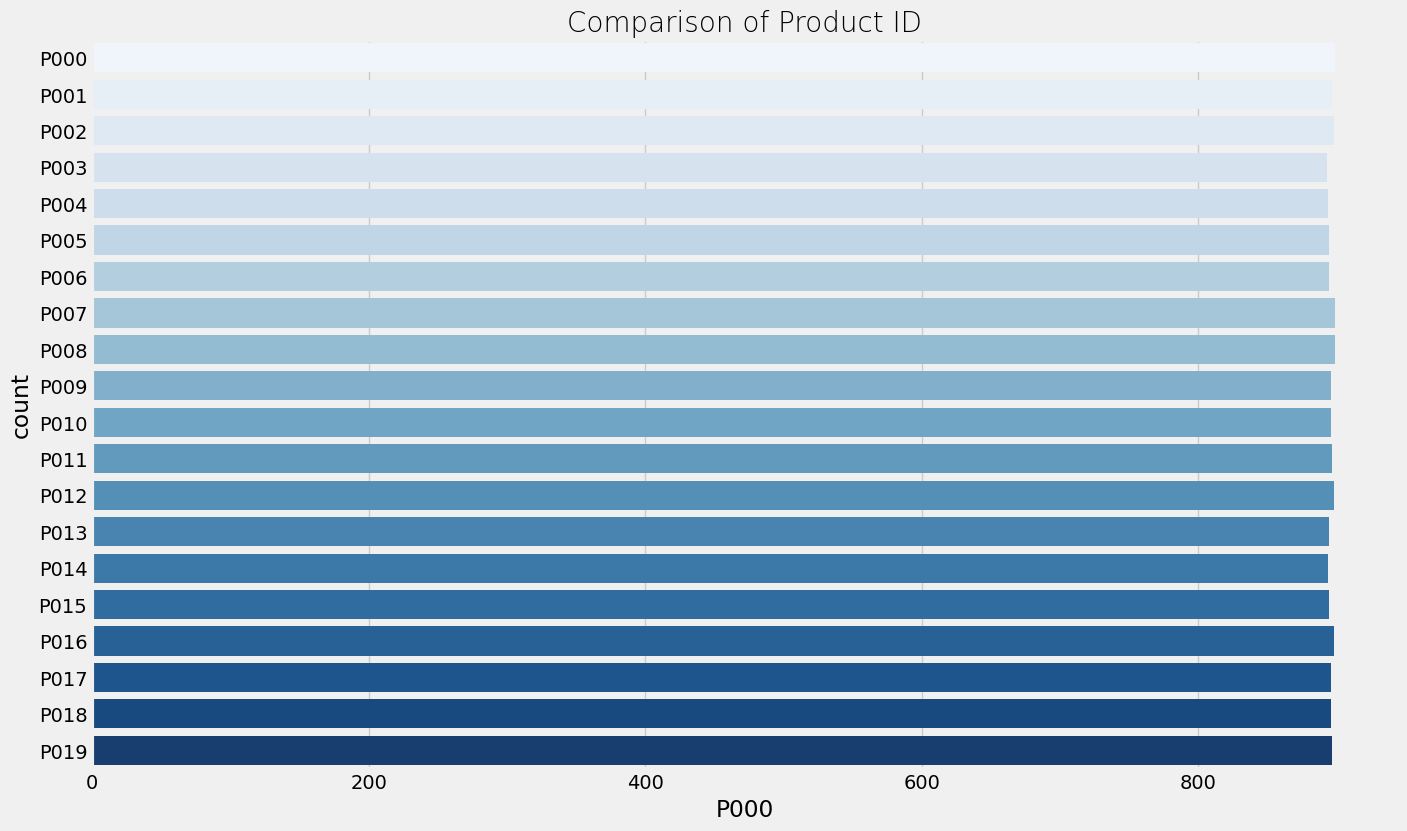

In [45]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()